
##### Javier Barrios - Joaquin Acuña - Nicolas Rojas Sección 002D

# Introducción

En el presente notebook abordaremos las primeras instancias del análisis exploratorio del Data Set entregado que consiste de datos extraídos de la biblioteca del congreso nacional (BCN) referentes a las votaciones realizadas por el senado de Chile

Para inducir al lenguaje que utilizaremos a lo largo de este Notebook se procederá a realizar un glosario de términos específicos y poniendo en contexto según corresponda:

### Análisis explotarorio:
Nos ayuda a organizar la información que nos dan los datos de manera de detectar algún patrón de comportamiento así como también apartamientos importantes al modelo subyacente.

### Población: 
total de sujetos o unidades de análisis de interés en el estudio. En este caso nuestra población serían todos los parlamentarios y días en los que se realizan votaciones por un tema en específico.

### Muestra: 
Cualquier subconjunto de los sujetos o unidades de análisis de la población, en el cual se recolectarán los datos. En este caso, nuestra muestra serán 51 días aleatorios en los cuales se realizaron votaciones.

### Gráficos de tortas:
Se representa la frecuencia relativa de cada categoría como una porción de un círculo, en la que el ángulo se corresponde con la frecuencia relativa correspondiente.

In [1]:
import pandas as pd 
import pickle
import numpy as np 
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt 
#import statistics as stats
#from numpy import argmax
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncode

# 1.- Carga de datos

In [2]:
import pickle
with open('Anexo Forma A_senate2020.pkl', 'rb') as f:
    df = pickle.load(f)

# 2.- Análisis exploratorio de datos

### Dataframe multindex, en primera vista de los datos, se puede decir que corresponde a un multindex, puesto que el dataset se divide en 2 subdataset "data" y "metadata", donde data corresponde a los votos realizados por los parlamentarios en cada sesión, y metadata corresponde a la sesion de la votación.

#### data
  * Votos

#### metadata
  * ABSTENCION: La cantidad total de abstenciones que se presentaron por sesión.
  * ETAPA: Es el proceso legislativo y define en qué etapa de este se encuentra la sesión.
  * FECHA: Fecha de la sesión.
  * NO: Número total de votos 'No' que se presentaron en la sesión.
  * PAREO: Se define como un acuerdo entre dos parlamentarios, de distintas bancadas o comités, a través del cual durante un              plazo determinado, se comprometen a no participar en ninguna votación si uno de ellos está ausente, esta variable              cuenta la cantidad de pareos que existieron en la sesión.
  * QUORUM: Número mínimo de legisladores cuya presencia es necesaria para sesionar válidamente en los órganos legislativos. La             variable muestra el quorum que se exigió en esa sesión.
  * SESION: Corresponde a un identificador de la sesión.
  * SI: Cantidad total de votos 'Si' que se presentaron en la sesión.
  * TEMA: Es la temática en cuestión que se discute en cada sesión, la cual está bajo votación de los parlamentarios.
  * TIPOVOTACION: El tipo de votación que se requirió en la sesión.

In [34]:
df

0    \
data     Latorre R., Juan Ignacio                                                        Si   
         Coloma C., Juan Antonio                                                         Si   
         García R., José                                                                 Si   
         Bianchi C., Carlos                                                              Si   
         Navarro B., Alejandro                                                           Si   
         Allende B., Isabel                                                              Si   
         Lagos W., Ricardo                                                               Si   
         García Huidobro S., Alejandro                                                   Si   
         Guillier Á., Alejandro                                                       Pareo   
         Durana S., José Miguel                                                          Si   
         Prohens E., Rafael                                                              Si   
         Pugh O., Kenneth                                                                Si   
         Elizalde S., Alvaro                                                             Si   
         Galilea V., Rodrigo                                                             Si   
         Huenchumilla J., Francisco                                                      Si   
         Sandoval P., David                                                              Si   
         Pizarro S., Jorge                                                              NaN   
         Girardi L., Guido                                                              NaN   
         Letelier M., Juan Pablo                                                        NaN   
         Pérez V., Víctor                                                               NaN   
         Chahuán C., Francisco                                                          NaN   
         Quintana L., Jaime                                                             NaN   
         Rincón G., Ximena                                                              NaN   
         Von Baer J., Ena                                                               NaN   
         Araya G., Pedro                                                                NaN   
         Van Rysselberghe H., Jacqueline                                                NaN   
         Goic B., Carolina                                                              NaN   
         Harboe B., Felipe                                                              NaN   
         De Urresti L., Alfonso                                                         NaN   
         Quinteros L., Rabindranath                                                     NaN   
         Moreira B., Iván                                                               NaN   
         Muñoz D., Adriana                                                              NaN   
         Ossandón I., Manuel José                                                       NaN   
         Insulza S., José Miguel                                                        NaN   
         Ebensperger O., Luz Eliana                                                     NaN   
         Soria Q., Jorge                                                                NaN   
         Provoste C., Yasna                                                             NaN   
         Castro P., Juan                                                                NaN   
         Aravena A., Carmen Gloria                                                      NaN   
         Kast S., Felipe                                                                NaN   
         Órdenes N., Ximena                                                             NaN   
         Allamand Z., Andrés                                                            NaN   
   

### tipo de datos existentes en el dataframe y tamaño del dataframe

In [4]:
df.dtypes

0      object
1      object
2      object
3      object
4      object
        ...  
420    object
421    object
422    object
423    object
424    object
Length: 424, dtype: object

In [43]:
df.shape

(55, 424)

### Se intentó hacer un análisis inicial con pandasprofiling, pero este no nos entregó mucha información.  

In [ ]:
ProfileReport(df)

# División de multindex separando "Data" de "Metadata" para una mejor visualización de los datos utilizando el metodo transpose de pandas

In [3]:
#Datos de "DATA", correspondiente a los votos de cada parlamentarios
dfData = df.iloc[:45,:]
dfData = pd.DataFrame.transpose(dfData)
dfData

data                                          \
    Latorre R., Juan Ignacio Coloma C., Juan Antonio García R., José   
0                         Si                      Si              Si   
1                         No                     NaN              Si   
2                         Si                      Si              Si   
3                         Si                      Si              Si   
4                         Si                      Si              Si   
..                       ...                     ...             ...   
420                       Si                      Si              Si   
421                       Si                      Si              Si   
422                       No                      Si              Si   
423               Abstencion                      Si              Si   
424                       Si                     NaN              Si   

                                                                 \
    Bianchi C., Carlos Navarro B., Alejandro Allende B., Isabel   
0                   Si                    Si                 Si   
1                   Si                    Si                 Si   
2                   Si                   NaN                 Si   
3                   Si                    Si                NaN   
4                   Si                    Si                 Si   
..                 ...                   ...                ...   
420                 Si                    Si                 Si   
421         Abstencion                    Si                 Si   
422         Abstencion                   NaN                 No   
423                 No                    No                 Si   
424                NaN                   NaN                 Si   

                                                                            \
    Lagos W., Ricardo García Huidobro S., Alejandro Guillier Á., Alejandro   
0                  Si                            Si                  Pareo   
1                 NaN                           NaN                     Si   
2                  Si                            Si                     Si   
3                 NaN                            Si                     Si   
4                  Si                            Si                     Si   
..                ...                           ...                    ...   
420                Si                            Si                     Si   
421                Si                            Si                     Si   
422                No                           NaN                     No   
423                Si                            Si                     Si   
424               NaN                            Si                    NaN   

                            ...                                     \
    Durana S., José Miguel  ... Soria Q., Jorge Provoste C., Yasna   
0                       Si  ...             NaN                NaN   
1                       Si  ...              Si                 Si   
2                      NaN  ...              Si                NaN   
3                       Si  ...              Si                 Si   
4                       Si  ...              Si                 Si   
..                     ...  ...             ...                ...   
420                     Si  ...              Si                 Si   
421                     Si  ...              Si         Abstencion   
422                     Si  ...             NaN         Abstencion   
423                     Si  ...              Si                 Si   
424                     No  ...              Si                 Si   

                                                               \
    Castro P., Juan Aravena A., Carmen Gloria Kast S., Felipe   
0               NaN                       NaN             NaN   
1                Si                        Si              Si   
2               NaN          

### Tipo de datos del dataframe dfData

In [4]:
dfData.dtypes

data  Latorre R., Juan Ignacio           object
      Coloma C., Juan Antonio            object
      García R., José                    object
      Bianchi C., Carlos                 object
      Navarro B., Alejandro              object
      Allende B., Isabel                 object
      Lagos W., Ricardo                  object
      García Huidobro S., Alejandro      object
      Guillier Á., Alejandro             object
      Durana S., José Miguel             object
      Prohens E., Rafael                 object
      Pugh O., Kenneth                   object
      Elizalde S., Alvaro                object
      Galilea V., Rodrigo                object
      Huenchumilla J., Francisco         object
      Sandoval P., David                 object
      Pizarro S., Jorge                  object
      Girardi L., Guido                  object
      Letelier M., Juan Pablo            object
      Pérez V., Víctor                   object
      Chahuán C., Francisco             

In [133]:
#Datos de "METADATA", correspondiente datos de las sesiones
dfMetadata = df.iloc[45:55]
pd.DataFrame.transpose(df)
dfMetadata = pd.DataFrame.transpose(dfMetadata)
dfMetadata

metadata                                                      \
    ABSTENCION                           ETAPA      FECHA NO PAREO   
0            0   Primer trámite constitucional 2018-12-12  0     1   
1            0   Primer trámite constitucional 2020-06-02  1     0   
2            1   Primer trámite constitucional 2019-12-30  0     1   
3            0   Primer trámite constitucional 2019-03-05  0     0   
4            0   Primer trámite constitucional 2020-01-29  0     0   
..         ...                             ...        ... ..   ...   
420          4   Primer trámite constitucional 2020-09-01  0     0   
421          3  Segundo trámite constitucional 2020-09-08  0     0   
422          4  Segundo trámite constitucional 2019-04-10  7     0   
423          1  Segundo trámite constitucional 2019-06-11  4     0   
424          1  Segundo trámite constitucional 2019-06-11  2     0   

                                        \
                   QUORUM   SESION  SI   
0          Mayoría simple   77/366  15   
1                    None   31/368  37   
2    Cuatro séptimos Q.C.   89/367  27   
3          Mayoría simple   94/366  39   
4    Cuatro séptimos Q.C.  103/367  35   
..                    ...      ...  ..   
420                  None   79/368  33   
421        Mayoría simple   84/368  35   
422        Mayoría simple    9/367  25   
423        Mayoría simple   24/367  33   
424        Mayoría simple   24/367  24   

                                                                              
                                                  TEMA          TIPOVOTACION  
0    Proyecto de ley, en primer trámite constitucio...     Discusión general  
1    Aprobación en particular del proyecto de ley q...     Discusión general  
2    Proyecto de ley, en primer trámite constitucio...     Discusión general  
3    Proyecto de ley, en primer trámite constitucio...     Discusión general  
4    Proyecto de ley, en primer trámite constitucio...  Discusión particular  
..                                                 ...                   ...  
420  Proyecto de ley, iniciado en Moción de los Hon...     Discusión general  
421  Aprobación, en general y particular, del proye...     Discusión general  
422  Proyecto de ley, en segundo trámite constituci...     Discusión general  
423  Proyecto de ley, en segundo trámite constituci...  Discusión particular  
424  Enmienda de la Comisión de Trabajo y Previsión...  Discusión particular  

[424 rows x 10 columns]

### Tipo de datos del dataframe dfMetadata

In [7]:
dfMetadata.dtypes

metadata  ABSTENCION              object
          ETAPA                   object
          FECHA           datetime64[ns]
          NO                      object
          PAREO                   object
          QUORUM                  object
          SESION                  object
          SI                      object
          TEMA                    object
          TIPOVOTACION            object
dtype: object


### Definiendo el metodo histograma para hacer uso mas adelante

In [61]:
def Histograma (var1,titulo,Lx,Ly):
    #Regla de Sturges
    Nro_Muestra = 424
    k = int(np.ceil(1+np.log2(Nro_Muestra)))
    plt.hist(var1,k)
    plt.title(titulo)
    plt.xlabel(Lx)
    plt.ylabel(Ly)
    plt.show()

In [26]:
Si = dfMetadata['metadata','SI']
No = dfMetadata['metadata','NO']

En el siguente histograma se puede ver un sesgo positivo, porque los datos atipicos se encuentran en esa direccion

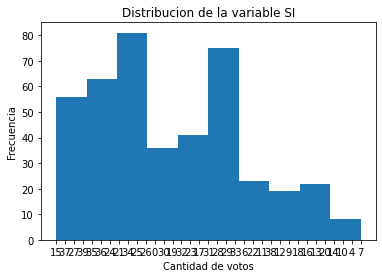

In [62]:
Histograma(Si,'Distribucion de la variable SI','Cantidad de votos','Frecuencia')

En el siguente histograma se puede ver un sesgo positivo, porque los datos atipicos se encuentran en esa direccion

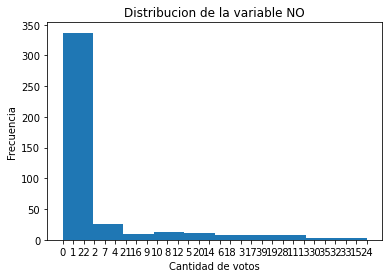

In [50]:
Histograma(No,'Distribucion de la variable NO','Cantidad de votos','Frecuencia')

# 3.- Tratamiento de datos faltantes

En esta sección, utilizamos un bucle "for" para poder recorrer todas las columnas en busqueda de datos nulos (en este caso los campos del index DATA). De esta manera, logramos identificar de manera clara y practica en que "lugares" se manifiestan la mayor cantidad de nulos.

In [254]:
for feature in dfData.columns:
  print('Total de valores nulos de', feature, '=',dfData[feature].isna().sum())

Total de valores nulos de ('data', 'Latorre R., Juan Ignacio') = 0
Total de valores nulos de ('data', 'Coloma C., Juan Antonio') = 0
Total de valores nulos de ('data', 'García R., José') = 0
Total de valores nulos de ('data', 'Bianchi C., Carlos') = 0
Total de valores nulos de ('data', 'Navarro B., Alejandro') = 0
Total de valores nulos de ('data', 'Allende B., Isabel') = 0
Total de valores nulos de ('data', 'Lagos W., Ricardo') = 0
Total de valores nulos de ('data', 'García Huidobro S., Alejandro') = 0
Total de valores nulos de ('data', 'Guillier Á., Alejandro') = 0
Total de valores nulos de ('data', 'Durana S., José Miguel') = 0
Total de valores nulos de ('data', 'Prohens E., Rafael') = 0
Total de valores nulos de ('data', 'Pugh O., Kenneth') = 0
Total de valores nulos de ('data', 'Elizalde S., Alvaro') = 0
Total de valores nulos de ('data', 'Galilea V., Rodrigo') = 0
Total de valores nulos de ('data', 'Huenchumilla J., Francisco') = 0
Total de valores nulos de ('data', 'Sandoval P.,

A continuación, utilizamos el mismo bucle "for" para poder recorrer todas las columnas en busqueda de datos nulos (en este caso los campos del index METADATA). De esta manera, logramos identificar de manera clara y practica en que "lugares" se manifiestan la mayor cantidad de nulos.

In [352]:
for feature in dfMetadata.columns:
  print('Total de valores nulos de', feature, '=',dfMetadata[feature].isna().sum())

Total de valores nulos de ('metadata', 'ABSTENCION') = 0
Total de valores nulos de ('metadata', 'ETAPA') = 0
Total de valores nulos de ('metadata', 'FECHA') = 0
Total de valores nulos de ('metadata', 'NO') = 0
Total de valores nulos de ('metadata', 'PAREO') = 0
Total de valores nulos de ('metadata', 'QUORUM') = 11
Total de valores nulos de ('metadata', 'SESION') = 0
Total de valores nulos de ('metadata', 'SI') = 0
Total de valores nulos de ('metadata', 'TEMA') = 1
Total de valores nulos de ('metadata', 'TIPOVOTACION') = 3


Es una **incongruencia** que no haya un tema de votación establecido y que esten registrados votos a favor del mismo. Por otro lado, bajo una investigación de la información se encontró el tema que se llevó a cabo en esa sesión. A continuación, se cita la fuente: https://www.camara.cl/legislacion/ProyectosDeLey/tramitacion.aspx?prmID=13050&prmBOLETIN=12519-02

In [281]:
dfMetadata[118:119]

metadata                                                     \
    ABSTENCION                          ETAPA      FECHA NO PAREO   
118          0  Primer trámite constitucional 2019-04-02  0     0   

                                                            
             QUORUM SESION  SI  TEMA          TIPOVOTACION  
118  Mayoría simple  5/367  12  None  Discusión particular

### Trabajando con la variable tema

Como se puede apreciar en el resultado del filtrado en particular que utilizamos como prueba de que existian "None" en la columna tema. Entonces, el tema fue modificado en base a la información que encontramos sobre el tema que se había tratado esa fecha en particular.

In [282]:
dfMetadata.iloc[118:119,8:9]='Modifica el Código de Justicia Militar, para excluir de la jurisdicción militar el conocimiento de las causas por delitos comunes cometidos por militares, y entregarlo a la justicia ordinaria'
dfMetadata.iloc[118:119]

metadata                                                     \
    ABSTENCION                          ETAPA      FECHA NO PAREO   
118          0  Primer trámite constitucional 2019-04-02  0     0   

                                \
             QUORUM SESION  SI   
118  Mayoría simple  5/367  12   

                                                                              
                                                  TEMA          TIPOVOTACION  
118  Modifica el Código de Justicia Militar, para e...  Discusión particular

### Trabajando con la variable Quorum

Las siguientes sesiones muestran QUORUM como 'None', lo cual podría entorpecer la vista de los datos. Como grupo hicimos una investigación y efectivamente en aquellas sesiones en las cuales hay 'None', no se requirió de un quorum específico para aprobar el proyecto. En adición a esto, todos los temas a discutir en aquellas sesiones eran en relación al COVID-19, por lo que estimamos como grupo que tiene sentido que no se pidiera un QUORUM en esas sesiones.

En conclusión a esto, cambiamos los datos de 'None' a 'No requerido', para que se pueda entender de mejor manera a simple vista el significado de estos datos, ya que antes de intervenirla, pareciera que estuvieran nulos, y no es así.

In [250]:
 # Identificamos las filas Quorum con valor None
dfMetadata[(dfMetadata['metadata','QUORUM']!='Mayoría simple') &
           (dfMetadata['metadata','QUORUM']!='Cuatro séptimos Q.C.') & 
           (dfMetadata['metadata','QUORUM']!='Q.C.')&
           (dfMetadata['metadata','QUORUM']!='Tres quintos Q.C.')&
           (dfMetadata['metadata','QUORUM']!='Dos tercios Q.C.')]

Empty DataFrame
Columns: [(metadata, ABSTENCION), (metadata, ETAPA), (metadata, FECHA), (metadata, NO), (metadata, PAREO), (metadata, QUORUM), (metadata, SESION), (metadata, SI), (metadata, TEMA), (metadata, TIPOVOTACION)]
Index: []

In [608]:
dfMetadata['metadata','QUORUM'] = dfMetadata['metadata','QUORUM'].fillna('No requerido')

### Trabajando con la variable Tipovotacion

In [611]:
# Identificamos las filas de TIPOVOTACION con valor None
dfMetadata[(dfMetadata['metadata','TIPOVOTACION']!='Discusión general') &
          (dfMetadata['metadata','TIPOVOTACION']!='Discusión única')&
          (dfMetadata['metadata','TIPOVOTACION']!='Discusión particular')&
          (dfMetadata['metadata','TIPOVOTACION']!='Discusión informe de Comisión Mixta')]
           

Empty DataFrame
Columns: [(metadata, ABSTENCION), (metadata, ETAPA), (metadata, FECHA), (metadata, NO), (metadata, PAREO), (metadata, QUORUM), (metadata, SESION), (metadata, SI), (metadata, TEMA), (metadata, TIPOVOTACION)]
Index: []

Tomamos la desición de eliminar las 3 filas con datos faltantes que se encontraban en la columna "TIPOVOTACION", porque bajo una ardua busqueda de información sobre estas filas, no se encontró información para reemplazar los datos faltantes. Por ende, decidimos que eliminar sería la mejor opción al ser pocos datos faltantes como para tener un gran impacto en nuestra toma de desiciones. 

In [610]:
dfMetadata=dfMetadata.dropna(axis=0,how="any")

### Trabajando con el dfData 

En el caso de los datos nulos que se presentaron en los parlamentarios, los reemplazamos por 'Ausencia', ya que nos pareció la conclusión más lógica del porqué el parlamentario contiene datos nulos en ese campo. En añadido a esto, este nuevo dato no intefiere con el tema que se busca abordar.

In [247]:
dfData = dfData.fillna('Ausencia')

In [45]:
dfData

data                                          \
    Latorre R., Juan Ignacio Coloma C., Juan Antonio García R., José   
0                         Si                      Si              Si   
1                         No                Ausencia              Si   
2                         Si                      Si              Si   
3                         Si                      Si              Si   
4                         Si                      Si              Si   
..                       ...                     ...             ...   
420                       Si                      Si              Si   
421                       Si                      Si              Si   
422                       No                      Si              Si   
423               Abstencion                      Si              Si   
424                       Si                Ausencia              Si   

                                                                 \
    Bianchi C., Carlos Navarro B., Alejandro Allende B., Isabel   
0                   Si                    Si                 Si   
1                   Si                    Si                 Si   
2                   Si              Ausencia                 Si   
3                   Si                    Si           Ausencia   
4                   Si                    Si                 Si   
..                 ...                   ...                ...   
420                 Si                    Si                 Si   
421         Abstencion                    Si                 Si   
422         Abstencion              Ausencia                 No   
423                 No                    No                 Si   
424           Ausencia              Ausencia                 Si   

                                                                            \
    Lagos W., Ricardo García Huidobro S., Alejandro Guillier Á., Alejandro   
0                  Si                            Si                  Pareo   
1            Ausencia                      Ausencia                     Si   
2                  Si                            Si                     Si   
3            Ausencia                            Si                     Si   
4                  Si                            Si                     Si   
..                ...                           ...                    ...   
420                Si                            Si                     Si   
421                Si                            Si                     Si   
422                No                      Ausencia                     No   
423                Si                            Si                     Si   
424          Ausencia                            Si               Ausencia   

                            ...                                     \
    Durana S., José Miguel  ... Soria Q., Jorge Provoste C., Yasna   
0                       Si  ...        Ausencia           Ausencia   
1                       Si  ...              Si                 Si   
2                 Ausencia  ...              Si           Ausencia   
3                       Si  ...              Si                 Si   
4                       Si  ...              Si                 Si   
..                     ...  ...             ...                ...   
420                     Si  ...              Si                 Si   
421                     Si  ...              Si         Abstencion   
422                     Si  ...        Ausencia         Abstencion   
423                     Si  ...              Si                 Si   
424                     No  ...              Si                 Si   

                                                               \
    Castro P., Juan Aravena A., Carmen Gloria Kast S., Felipe   
0          Ausencia                  Ausencia        Ausencia   
1                Si                        Si              Si   
2          Ausencia          

## Confirmamos que no quden nullos en los dataframes

In [ ]:
for feature in dfData.columns:
  print('Total de valores nulos de', feature, '=',dfData[feature].isna().sum())

In [ ]:
for feature in dfMetadata.columns:
  print('Total de valores nulos de', feature, '=',dfMetadata[feature].isna().sum())

# TRABAJANDO ESTADO DE SESIÓN

### Mayoría simple

In [515]:
#Agrupo por Quorum "Mayoría simple"
dfMayoria = dfMetadata[dfMetadata['metadata','QUORUM'] == 'Mayoría simple']
#Transformo de  object a int
dfSI = dfMayoria['metadata','SI'].astype(int)
dfNO = dfMayoria['metadata','NO'].astype(int)
#Condicion
dfMayoria['metadata','ESTADO'] = np.where(dfSI>dfNO,'Aprobada','Rechazada')
# Pruebo y comparo resultados
dfMayoria.tail(10)

<ipython-input-515-1cd5a3ffd814>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMayoria['metadata','ESTADO'] = np.where(dfSI>dfNO,'Aprobada','Rechazada')


metadata                                                                \
    ABSTENCION                                              ETAPA      FECHA   
410          0                     Segundo trámite constitucional 2018-10-03   
411          4                     Segundo trámite constitucional 2019-03-06   
412          1                     Segundo trámite constitucional 2019-03-06   
413          0  Disc. informe C.Mixta por rechazo de modif. C.... 2019-03-20   
417          0                      Primer trámite constitucional 2018-10-23   
418          0                      Primer trámite constitucional 2018-10-23   
421          3                     Segundo trámite constitucional 2020-09-08   
422          4                     Segundo trámite constitucional 2019-04-10   
423          1                     Segundo trámite constitucional 2019-06-11   
424          1                     Segundo trámite constitucional 2019-06-11   

                                           \
     NO PAREO          QUORUM  SESION  SI   
410   0     1  Mayoría simple  56/366  37   
411  17     0  Mayoría simple  95/366   6   
412  24     0  Mayoría simple  95/366   6   
413   0     1  Mayoría simple   4/367  31   
417  19     1  Mayoría simple  62/366  16   
418   5     1  Mayoría simple  62/366  16   
421   0     0  Mayoría simple  84/368  35   
422   7     0  Mayoría simple   9/367  25   
423   4     0  Mayoría simple  24/367  33   
424   2     0  Mayoría simple  24/367  24   

                                                        \
                                                  TEMA   
410  Proyecto de ley, en segundo trámite constituci...   
411  Proyecto de ley, en segundo trámite constituci...   
412  Proyecto de ley, en segundo trámite constituci...   
413  Informe de la Comisión Mixta encargada de prop...   
417  Proyecto de ley, en primer trámite constitucio...   
418  Proyecto de ley, en primer trámite constitucio...   
421  Aprobación, en general y particular, del proye...   
422  Proyecto de ley, en segundo trámite constituci...   
423  Proyecto de ley, en segundo trámite constituci...   
424  Enmienda de la Comisión de Trabajo y Previsión...   

                                                     
                            TIPOVOTACION     ESTADO  
410                    Discusión general   Aprobada  
411                 Discusión particular  Rechazada  
412                 Discusión particular  Rechazada  
413  Discusión informe de Comisión Mixta   Aprobada  
417                 Discusión particular  Rechazada  
418                 Discusión particular   Aprobada  
421                    Discusión general   Aprobada  
422                    Discusión general   Aprobada  
423                 Discusión particular   Aprobada  
424                 Discusión particular   Aprobada

## Histograma de frecuencias de  ESTADO

<AxesSubplot:>

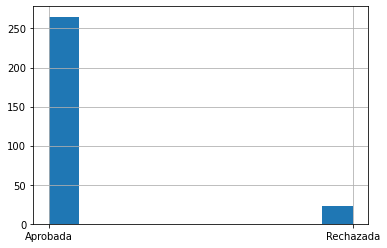

In [511]:
dfMayoria['metadata','ESTADO'].hist()

### Cuatro séptimos Q.C.

In [620]:
# Agrupo por Quorum ('Cuatro séptimos Q.C.')
dfCuatroSept = dfMetadata[dfMetadata['metadata','QUORUM'] == 'Cuatro séptimos Q.C.']
# Definición de las variables
CuatroSepSI = dfCuatroSept['metadata','SI'].astype(int)
CuatroSepNO = dfCuatroSept['metadata','NO'].astype(int)
Porcentaje  = CuatroSepNO + CuatroSepSI * 0.57
## Falta incluir Pareo y Abstencion
Pareo       = dfCuatroSept['metadata','PAREO'].astype(int)

dfCuatroSept['metadata','ESTADO'] = np.where(CuatroSepSI>Porcentaje,'Aprobada','Rechazada')
dfCuatroSept

<ipython-input-620-5003d644848b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCuatroSept['metadata','ESTADO'] = np.where(CuatroSepSI>Porcentaje,'Aprobada','Rechazada')


metadata                                                      \
    ABSTENCION                           ETAPA      FECHA NO PAREO   
2            1   Primer trámite constitucional 2019-12-30  0     1   
4            0   Primer trámite constitucional 2020-01-29  0     0   
5            0   Tercer trámite constitucional 2020-07-29  0     0   
7            0  Segundo trámite constitucional 2020-11-03  0     0   
21           1   Primer trámite constitucional 2019-01-09  0     0   
..         ...                             ...        ... ..   ...   
390          0  Segundo trámite constitucional 2018-07-31  0     0   
393          1  Segundo trámite constitucional 2020-03-25  0     0   
414          0  Segundo trámite constitucional 2019-07-23  0     1   
416          0   Primer trámite constitucional 2018-10-23  0     1   
419          0   Primer trámite constitucional 2018-10-23  8     1   

                                        \
                   QUORUM   SESION  SI   
2    Cuatro séptimos Q.C.   89/367  27   
4    Cuatro séptimos Q.C.  103/367  35   
5    Cuatro séptimos Q.C.   57/368  36   
7    Cuatro séptimos Q.C.  108/368  35   
21   Cuatro séptimos Q.C.   87/366  37   
..                    ...      ...  ..   
390  Cuatro séptimos Q.C.   35/366  36   
393  Cuatro séptimos Q.C.    6/368  29   
414  Cuatro séptimos Q.C.   35/367  39   
416  Cuatro séptimos Q.C.   62/366  26   
419  Cuatro séptimos Q.C.   62/366  25   

                                                                              \
                                                  TEMA          TIPOVOTACION   
2    Proyecto de ley, en primer trámite constitucio...     Discusión general   
4    Proyecto de ley, en primer trámite constitucio...  Discusión particular   
5    Aprobación del informe de la Comisión de Salud...       Discusión única   
7    Aprobación en general del proyecto de ley, en ...     Discusión general   
21   Proyecto de ley, en primer trámite constitucio...     Discusión general   
..                                                 ...                   ...   
390  Proyecto de ley, en segundo trámite constituci...     Discusión general   
393  Aprobación, en general y en particular, con mo...     Discusión general   
414  Proyecto de ley, en segundo trámite constituci...     Discusión general   
416  Proyecto de ley, en primer trámite constitucio...  Discusión particular   
419                          Votación del artículo 18°  Discusión particular   

               
       ESTADO  
2    Aprobada  
4    Aprobada  
5    Aprobada  
7    Aprobada  
21   Aprobada  
..        ...  
390  Aprobada  
393  Aprobada  
414  Aprobada  
416  Aprobada  
419  Aprobada  

[93 rows x 11 columns]

### Histograma de frecuencias de estado 4/7

<AxesSubplot:>

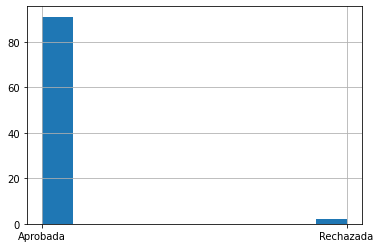

In [602]:
dfCuatroSept['metadata','ESTADO'].hist()

### Tres quintos Q.C.

In [619]:
dfTresQuint = dfMetadata[dfMetadata['metadata','QUORUM'] == 'Tres quintos Q.C.']

TresQSI = dfTresQuint['metadata','SI'].astype(int)
TresQNO = dfTresQuint['metadata','NO'].astype(int)
Porcentaje  = TresQNO + TresQSI * 0.6
## Falta incluir Pareo y Abstencion
Pareo       = dfTresQuint['metadata','PAREO'].astype(int)

dfTresQuint['metadata','ESTADO'] = np.where(TresQSI>Porcentaje,'Aprobada','Rechazada')
dfTresQuint

<ipython-input-619-7723c04101fd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTresQuint['metadata','ESTADO'] = np.where(TresQSI>Porcentaje,'Aprobada','Rechazada')


metadata                                                       \
    ABSTENCION                           ETAPA      FECHA  NO PAREO   
48           1  Segundo trámite constitucional 2019-05-07   0     0   
137          4   Primer trámite constitucional 2019-11-27  20     0   
189          0   Primer trámite constitucional 2020-05-13   0     0   
192          0   Primer trámite constitucional 2020-08-13   0     0   
193          1   Primer trámite constitucional 2020-08-13   0     0   
223          0   Primer trámite constitucional 2020-03-18   0     0   
254          0   Primer trámite constitucional 2020-03-23   1     0   
256          0  Segundo trámite constitucional 2019-11-13   4     0   
370          0   Primer trámite constitucional 2018-05-08   0     0   

                                    \
                QUORUM  SESION  SI   
48   Tres quintos Q.C.  14/367  37   
137  Tres quintos Q.C.  76/367  12   
189  Tres quintos Q.C.  23/368  37   
192  Tres quintos Q.C.  67/368  39   
193  Tres quintos Q.C.  67/368  35   
223  Tres quintos Q.C.   3/368  33   
254  Tres quintos Q.C.   4/368  30   
256  Tres quintos Q.C.  68/367  36   
370  Tres quintos Q.C.  13/366  36   

                                                                           \
                                                  TEMA       TIPOVOTACION   
48   Proyecto de reforma constitucional, en segundo...  Discusión general   
137  Proyecto de reforma constitucional, en primer ...  Discusión general   
189  Aprobación, en general y en particular, del pr...  Discusión general   
192  Aprobación en general del proyecto de reforma ...  Discusión general   
193  Aprobación en particular del proyecto de refor...  Discusión general   
223  Aprobación en general y en particular del proy...  Discusión general   
254  Proyectos de reforma constitucional, en primer...  Discusión general   
256  Proyecto de reforma constitucional, en segundo...  Discusión general   
370  Proyecto de ley, en primer trámite constitucio...  Discusión general   

                
        ESTADO  
48    Aprobada  
137  Rechazada  
189   Aprobada  
192   Aprobada  
193   Aprobada  
223   Aprobada  
254   Aprobada  
256   Aprobada  
370   Aprobada

### Histograma de frecuencias ESTADO 

<AxesSubplot:>

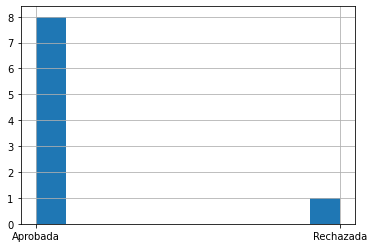

In [621]:
dfTresQuint['metadata','ESTADO'].hist()

### Dos tercios Q.C.

In [632]:
dfDosTerc = dfMetadata[dfMetadata['metadata','QUORUM'] == 'Tres quintos Q.C.']

DosTercSI = dfDosTerc['metadata','SI'].astype(int)
DosTercNO = dfDosTerc['metadata','NO'].astype(int)
Porcentaje  = DosTercNO + DosTercSI * 0.66
## Falta incluir Pareo y Abstencion
Pareo       = dfDosTerc['metadata','PAREO'].astype(int)

dfDosTerc['metadata','ESTADO'] = np.where(DosTercSI>Porcentaje,'Aprobada','Rechazada')
dfDosTerc

<ipython-input-632-d5a68448008a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDosTerc['metadata','ESTADO'] = np.where(DosTercSI>Porcentaje,'Aprobada','Rechazada')


metadata                                                       \
    ABSTENCION                           ETAPA      FECHA  NO PAREO   
48           1  Segundo trámite constitucional 2019-05-07   0     0   
137          4   Primer trámite constitucional 2019-11-27  20     0   
189          0   Primer trámite constitucional 2020-05-13   0     0   
192          0   Primer trámite constitucional 2020-08-13   0     0   
193          1   Primer trámite constitucional 2020-08-13   0     0   
223          0   Primer trámite constitucional 2020-03-18   0     0   
254          0   Primer trámite constitucional 2020-03-23   1     0   
256          0  Segundo trámite constitucional 2019-11-13   4     0   
370          0   Primer trámite constitucional 2018-05-08   0     0   

                                    \
                QUORUM  SESION  SI   
48   Tres quintos Q.C.  14/367  37   
137  Tres quintos Q.C.  76/367  12   
189  Tres quintos Q.C.  23/368  37   
192  Tres quintos Q.C.  67/368  39   
193  Tres quintos Q.C.  67/368  35   
223  Tres quintos Q.C.   3/368  33   
254  Tres quintos Q.C.   4/368  30   
256  Tres quintos Q.C.  68/367  36   
370  Tres quintos Q.C.  13/366  36   

                                                                           \
                                                  TEMA       TIPOVOTACION   
48   Proyecto de reforma constitucional, en segundo...  Discusión general   
137  Proyecto de reforma constitucional, en primer ...  Discusión general   
189  Aprobación, en general y en particular, del pr...  Discusión general   
192  Aprobación en general del proyecto de reforma ...  Discusión general   
193  Aprobación en particular del proyecto de refor...  Discusión general   
223  Aprobación en general y en particular del proy...  Discusión general   
254  Proyectos de reforma constitucional, en primer...  Discusión general   
256  Proyecto de reforma constitucional, en segundo...  Discusión general   
370  Proyecto de ley, en primer trámite constitucio...  Discusión general   

                
        ESTADO  
48    Aprobada  
137  Rechazada  
189   Aprobada  
192   Aprobada  
193   Aprobada  
223   Aprobada  
254   Aprobada  
256   Aprobada  
370   Aprobada

### Histograma de frecuencia ESTADO

<AxesSubplot:>

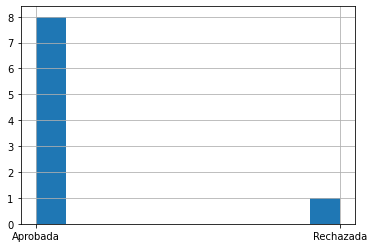

In [626]:
dfDosTerc['metadata','ESTADO'].hist()

### QUORUM No requerido

In [631]:
dfNoRequ = dfMetadata[dfMetadata['metadata','QUORUM'] == 'No requerido']

SI = dfNoRequ['metadata','SI'].astype(int)
NO = dfNoRequ['metadata','NO'].astype(int)

## Falta incluir Pareo y Abstencion
Pareo       = dfNoRequ['metadata','PAREO'].astype(int)

dfNoRequ['metadata','ESTADO'] = np.where(SI>NO,'Aprobada','Rechazada')
dfNoRequ

<ipython-input-631-f4ea64f13a62>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNoRequ['metadata','ESTADO'] = np.where(SI>NO,'Aprobada','Rechazada')


metadata                                                       \
    ABSTENCION                           ETAPA      FECHA  NO PAREO   
1            0   Primer trámite constitucional 2020-06-02   1     0   
73           0  Segundo trámite constitucional 2020-07-07   0     0   
172          0  Segundo trámite constitucional 2020-06-16   0     0   
175          0  Segundo trámite constitucional 2020-07-08   0     0   
188          0   Primer trámite constitucional 2020-09-01   0     0   
190          0   Tercer trámite constitucional 2020-05-20  39     0   
279          0   Primer trámite constitucional 2020-06-24   0     0   
284          0   Tercer trámite constitucional 2020-06-08   0     0   
364          2  Segundo trámite constitucional 2020-05-20   0     0   
415          0  Segundo trámite constitucional 2020-07-21   0     1   
420          4   Primer trámite constitucional 2020-09-01   0     0   

                               \
           QUORUM  SESION  SI   
1    No requerido  31/368  37   
73   No requerido  47/368  37   
172  No requerido  39/368  33   
175  No requerido  48/368  33   
188  No requerido  79/368  39   
190  No requerido  25/368   0   
279  No requerido  44/368  39   
284  No requerido  34/368  39   
364  No requerido  24/368  38   
415  No requerido  51/368  38   
420  No requerido  79/368  33   

                                                                              \
                                                  TEMA          TIPOVOTACION   
1    Aprobación en particular del proyecto de ley q...     Discusión general   
73   Aprobación en general del proyecto de ley que ...     Discusión general   
172  Aprobación en particular del proyecto de ley, ...  Discusión particular   
175  Aprobación de la Convención Multilateral para ...     Discusión general   
188  Aprobación en general del proyecto de ley, en ...     Discusión general   
190  Proyecto de reforma constitucional, en tercer ...       Discusión única   
279  Aprobación en general y en particular del proy...     Discusión general   
284  Aprobación de las enmiendas propuestas por la ...       Discusión única   
364  Proyecto de ley, en segundo trámite constituci...  Discusión particular   
415  Aprobación en particular del proyecto de ley, ...  Discusión particular   
420  Proyecto de ley, iniciado en Moción de los Hon...     Discusión general   

                
        ESTADO  
1     Aprobada  
73    Aprobada  
172   Aprobada  
175   Aprobada  
188   Aprobada  
190  Rechazada  
279   Aprobada  
284   Aprobada  
364   Aprobada  
415   Aprobada  
420   Aprobada

In [636]:
dfMetaFinal = pd.concat([dfMayoria,dfCuatroSept,dfDosTerc,dfNoRequ,dfTresQuint],axis=0)


# AQui mañana, falta afinar detalles de los ESTADOS, CLASIFICAR

In [420]:
#Datos de "METADATA", correspondiente datos de las sesiones
dfMetadata = df.iloc[45:55]
pd.DataFrame.transpose(df)
dfMetadata = pd.DataFrame.transpose(dfMetadata)
dfMetadata

metadata                                                      \
    ABSTENCION                           ETAPA      FECHA NO PAREO   
0            0   Primer trámite constitucional 2018-12-12  0     1   
1            0   Primer trámite constitucional 2020-06-02  1     0   
2            1   Primer trámite constitucional 2019-12-30  0     1   
3            0   Primer trámite constitucional 2019-03-05  0     0   
4            0   Primer trámite constitucional 2020-01-29  0     0   
..         ...                             ...        ... ..   ...   
420          4   Primer trámite constitucional 2020-09-01  0     0   
421          3  Segundo trámite constitucional 2020-09-08  0     0   
422          4  Segundo trámite constitucional 2019-04-10  7     0   
423          1  Segundo trámite constitucional 2019-06-11  4     0   
424          1  Segundo trámite constitucional 2019-06-11  2     0   

                                        \
                   QUORUM   SESION  SI   
0          Mayoría simple   77/366  15   
1                    None   31/368  37   
2    Cuatro séptimos Q.C.   89/367  27   
3          Mayoría simple   94/366  39   
4    Cuatro séptimos Q.C.  103/367  35   
..                    ...      ...  ..   
420                  None   79/368  33   
421        Mayoría simple   84/368  35   
422        Mayoría simple    9/367  25   
423        Mayoría simple   24/367  33   
424        Mayoría simple   24/367  24   

                                                                              
                                                  TEMA          TIPOVOTACION  
0    Proyecto de ley, en primer trámite constitucio...     Discusión general  
1    Aprobación en particular del proyecto de ley q...     Discusión general  
2    Proyecto de ley, en primer trámite constitucio...     Discusión general  
3    Proyecto de ley, en primer trámite constitucio...     Discusión general  
4    Proyecto de ley, en primer trámite constitucio...  Discusión particular  
..                                                 ...                   ...  
420  Proyecto de ley, iniciado en Moción de los Hon...     Discusión general  
421  Aprobación, en general y particular, del proye...     Discusión general  
422  Proyecto de ley, en segundo trámite constituci...     Discusión general  
423  Proyecto de ley, en segundo trámite constituci...  Discusión particular  
424  Enmienda de la Comisión de Trabajo y Previsión...  Discusión particular  

[424 rows x 10 columns]

In [ ]:
#wine_data = pd.concat([df_vinoNegro,df_vinoBlanco],axis=0)